In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 2015년도 미세먼지의 데이터를 이용한 상관관계 분석

In [6]:
data=pd.read_pickle('2015_data.pickle')
print("데이터의 총 수:", len(data))
data.tail()

데이터의 총 수: 5461


,Location,Date,SO2,CO,O3,NO2,PM10,PM25
5456,충북,2015-12-27,0.006,0.547,0.018,0.018,43.454,26.738
5457,충북,2015-12-28,0.005,0.568,0.012,0.025,36.038,21.360
5458,충북,2015-12-29,0.006,0.845,0.007,0.032,56.063,33.824
5459,충북,2015-12-30,0.006,0.862,0.006,0.031,64.832,42.903
5460,충북,2015-12-31,0.006,0.895,0.009,0.030,64.295,53.211


In [7]:
data[data.Location.isin(['서울'])].tail()

,Location,Date,SO2,CO,O3,NO2,PM10,PM25
4818,서울,2015-12-27,0.005,0.433,0.019,0.019,29.940,16.030
4819,서울,2015-12-28,0.005,0.507,0.015,0.027,27.810,14.918
4820,서울,2015-12-29,0.007,0.984,0.004,0.052,57.145,31.710
4821,서울,2015-12-30,0.006,0.826,0.004,0.050,59.556,34.951
4822,서울,2015-12-31,0.006,0.845,0.007,0.042,63.472,42.773


In [8]:
data_seoul=data[data.Location.isin(['서울'])]
data_seoul.corr()

,SO2,CO,O3,NO2,PM10,PM25
SO2,1.000000,0.643323,-0.185885,0.642349,0.377125,0.602491
CO,0.643323,1.000000,-0.597343,0.832596,0.380044,0.732430
O3,-0.185885,-0.597343,1.000000,-0.523796,-0.065889,-0.123384
NO2,0.642349,0.832596,-0.523796,1.000000,0.295676,0.601958
PM10,0.377125,0.380044,-0.065889,0.295676,1.000000,0.671326
PM25,0.602491,0.732430,-0.123384,0.601958,0.671326,1.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# seaborn이 안깔려있을경우 pip install seaborn
%matplotlib inline

# 미세먼지 데이터 전체를 상관분석해 Heatmap으로 시각화
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(20,10))

'''
sns.heatmap변수들
sns.heatmap(corr_data, annot=True, fmt=".2f", linewidths=1, cmap="색상")

corr_data: 상관관계를 하려는 데이터
annot = 글자 또는 X,Y 라벨을 표현할 것인지의 여부, default는 False로 됨
fmt = 소수점을 나타내는 범위
linewidths = 상관관계 시 옆칸과의 간격을 나타냄
cmap = 색상을 표현하는 방법, RdBu_r, YlGnBu, PuBu_r 등 다양하게 표현 가능
'''
#그러므로 seaborn라이브러리를 이용해 heatmap표현 함
sns_heatmap=sns.heatmap(data.corr(),annot=True, fmt=".2f", linewidths=.5, cmap="RdBu_r")

In [7]:
test=data.corr()

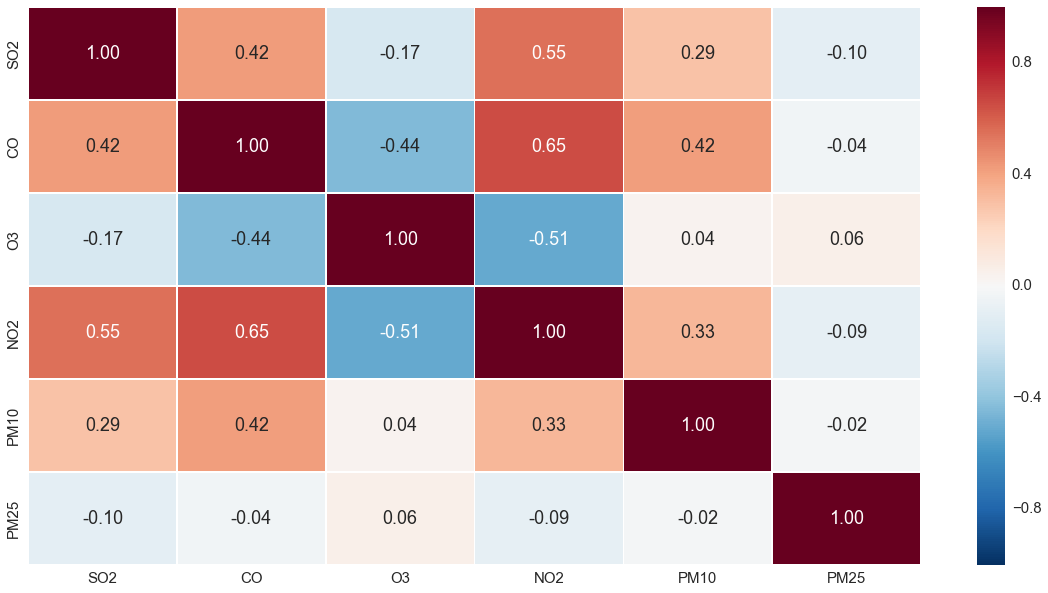

In [6]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(20,10))
sns_heatmap=sns.heatmap(data.corr(),annot=True, fmt=".2f", linewidths=.5, cmap="RdBu_r")

#### 2005년~2016년 3월까지지의 미세먼지와 기상데이터를 혼합하여 상관관계 분석

In [31]:
# total_weather.pickle파일은 2005년~2016년 3월까지의 데이터를 하나의 파일로 묶어 놓은 것
data=pd.read_pickle('total_weather.pickle')

In [41]:
# 위에서 호출한 data 중 서울 부분의 내용만 따로 가져옴
data_seoul=data[data.Location.isin(['서울'])]

# 각 계절별로 분류
date_dict = {"01":"겨울","02":"겨울","03":"봄", "04":"봄", "05":"봄", "06":"여름", "07":"여름", "08":"여름",\
             "09":"가을","10":"가을","11":"가을","12":"겨울"}
data_seoul['Season']=data_seoul.Date.str[5:7].map(date_dict)

# 계절별로 분류한 내용을 전체 DataFrame에서 겨울에 해당하는 내용을 가져옴
data_seoul=data_seoul[data_seoul.Season.isin(['겨울'])]

C:\Users\Administrator\Anaconda2\envs\py34\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
data_seoul.tail()

,Date,Location,SO2,CO,O3,NO2,PM10,PM25,Temp,Rainfall,...,Humidity,Steam,SeaSteam,DayLight,snow,Cloud,MiddleCloud,LandTemp,FogTimeArr,Season
63481,2016-02-25,서울,0.006,0.601,0.020,0.035,49.760,27.315,-0.2,0.0,...,49.9,3.1,1032.7,11.24,0.0,2.4,2.4,1.2,0,겨울
63482,2016-02-26,서울,0.007,0.580,0.022,0.036,49.327,28.239,2.2,0.0,...,41.3,2.8,1028.2,15.23,0.0,3.0,2.5,3.4,0,겨울
63483,2016-02-27,서울,0.006,0.612,0.019,0.040,65.156,39.973,3.3,0.2,...,57.6,4.4,1024.5,11.21,0.0,6.6,3.0,4.5,0,겨울
63484,2016-02-28,서울,0.005,0.634,0.015,0.041,45.866,27.741,0.7,4.1,...,65.5,4.1,1022.2,4.76,5.0,6.1,2.8,1.4,0,겨울
63485,2016-02-29,서울,0.005,0.436,0.029,0.020,54.607,27.617,-3.8,0.0,...,48.6,2.3,1025.5,10.38,4.3,2.5,2.5,0.4,0,겨울


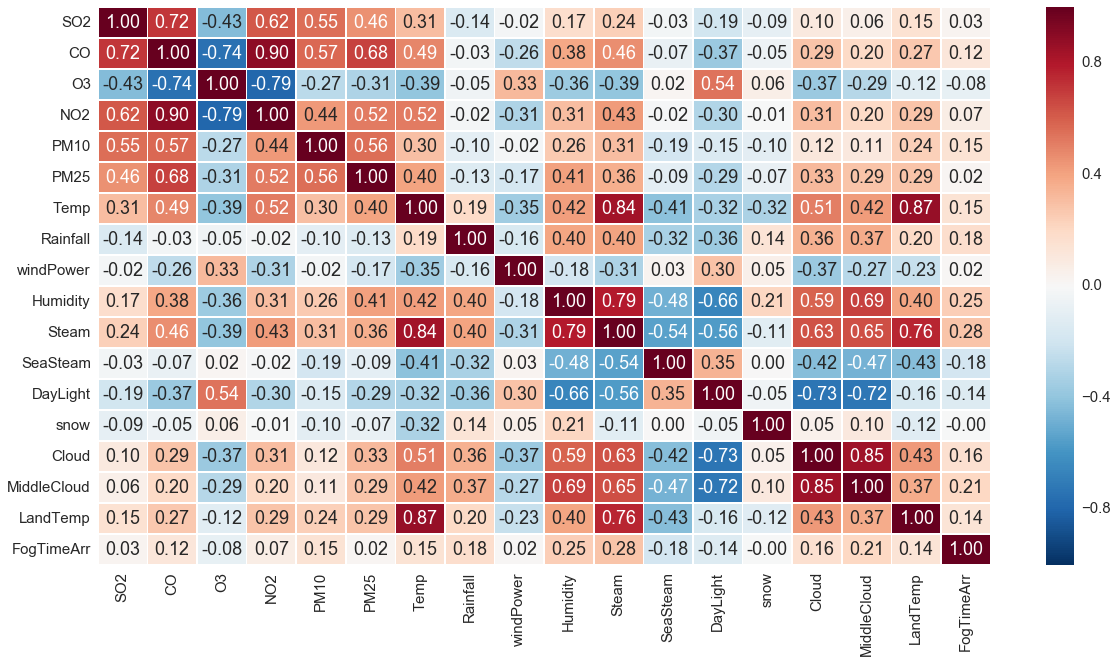

In [43]:
# 아래는 상관관계분석을하여 표현함
# seaborn은 한글이 표시가 안되는 경우가 있으니 주의
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(20,10))
sns_heatmap=sns.heatmap(data_seoul.corr(),annot=True, fmt=".2f", linewidths=.5, cmap="RdBu_r")